In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import seaborn as sns
from keras import models
from keras import layers
from keras import regularizers
import os
from scipy.stats import gaussian_kde
from numpy.random import seed
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_csv('../data/stellar_mass-smoogn_data.csv')
df_test = pd.read_csv('../data/test-halos_and_gals.csv')

In [3]:
x_train = np.array([df_train['M_h'], df_train['R_h'], df_train['V_h']]).T
x_test = np.array([df_test['M_h'], df_test['R_h'], df_test['V_h']]).T

y_train = np.array([df_train['M_g']]).T
y_test = np.array([df_test['M_g']]).T

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1001, 3), (303, 3), (1001, 1), (303, 1))

In [5]:
#Preparing data
mean_data = np.mean(x_train, axis = 0)
std_data = np.std(x_train, axis = 0)
mean_data, std_data

(array([11.21893708, -6.5262624 ,  2.13033063]),
 array([0.7073557 , 0.2357897 , 0.23718377]))

In [6]:
x_train -= mean_data
x_train /= std_data
x_test -= mean_data
x_test /= std_data

In [7]:
def base_model():
    model = models.Sequential() 
    model.add(layers.Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)))
    model.add(layers.Dense(32, activation = 'relu'))
    model.add(layers.Dense(1))
    
    print(model.summary())
    
    model.compile(optimizer = 'Adamax', loss = 'mse')
    
    return model

In [8]:
my_model = base_model()
my_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
#Fitting data
no_epochs = 100
batch_size = 100
validation_split = 0.2
history = my_model.fit(x_train, y_train, epochs = no_epochs, batch_size = batch_size, validation_split = validation_split)
history

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 80.5277 - val_loss: 68.5074
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 77.7240 - val_loss: 65.8922
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 75.3250 - val_loss: 63.4122
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 72.9634 - val_loss: 60.8405
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 70.5203 - val_loss: 58.1342
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 67.8430 - val_loss: 55.1010
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 64.8758 - val_loss: 51.7384
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 61.6247 - val_loss: 48.2538
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 58.1566 - val_loss: 44.5655
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 54.4049 - val_loss: 40.6986
Epoch 11

In [10]:
train_loss = history.history['loss']
train_val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

Text(0.5, 0, 'Epochs')

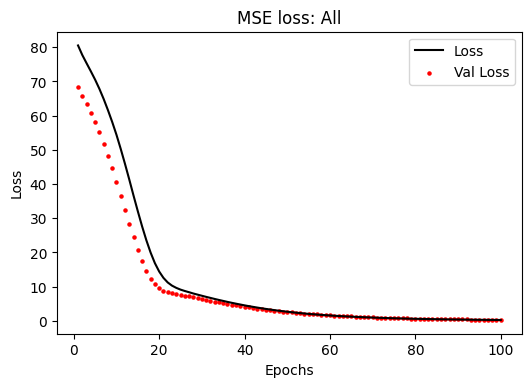

In [11]:
plt.figure(dpi=100)
plt.plot(epochs, train_loss, color = 'black',label = 'Loss')
plt.scatter(epochs, train_val_loss, s = 5, color = 'red', label = 'Val Loss')
plt.legend()  
plt.title('MSE loss: All')
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [12]:
#Prediction
prediction = my_model.predict(x_test)

10/10 [==============================] - 0s 1ms/step


In [13]:
#Scores
MSE = mean_squared_error(prediction, y_test)
MSE

0.2423624606858279

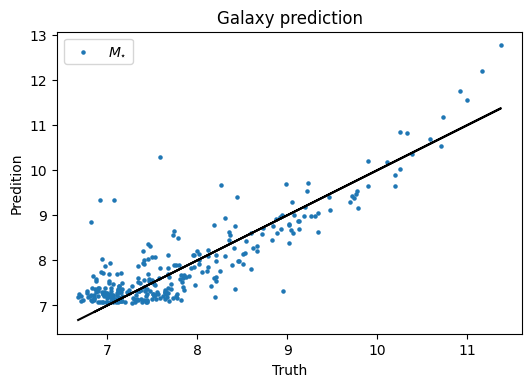

In [15]:
plt.figure(dpi = 100)
plt.title('Galaxy prediction')
plt.scatter(y_test[:, 0], prediction[:, 0], s = 5, color = 'C0', label = '$M_{\star}$')
plt.xlabel(r'Truth')
plt.plot(y_test[:, 0], y_test[:, 0], color = 'black')
plt.ylabel(r'Predition')
plt.legend()

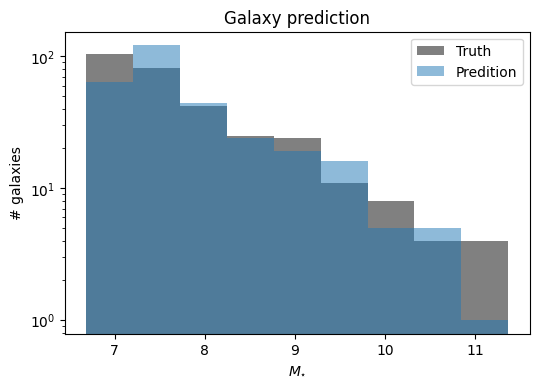

In [17]:
plt.figure(dpi = 100)
plt.title('Galaxy prediction')

bins = np.linspace(np.min(y_test[:, 0]), np.max(y_test[:, 0]), 10)
plt.hist(y_test[:, 0], bins = bins, color = 'gray', label = 'Truth')
plt.hist(prediction[:, 0], bins = bins, color = 'C0', alpha = 0.5, label = 'Predition')
plt.xlabel(r'$M_{\star}$')
plt.ylabel(r'# galaxies')
plt.legend()
plt.yscale('log')